In [1]:
import pandas as pd

# Load the train and validation CSV files
train_df = pd.read_csv('train.csv')
val_df = pd.read_csv('val.csv')

# Combine the dataframes
total_df = pd.concat([train_df, val_df], ignore_index=True)

# Save the combined dataframe to total.csv
total_df.to_csv('total.csv', index=False)

print("Files combined and saved as 'total.csv'")


Files combined and saved as 'total.csv'


In [2]:
# Load the reduced CSV file
df = pd.read_csv("total.csv")

# Check the shape of the DataFrame
print(df.shape)

(18000, 2)


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the combined CSV file
total_df = pd.read_csv('total.csv')

C:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


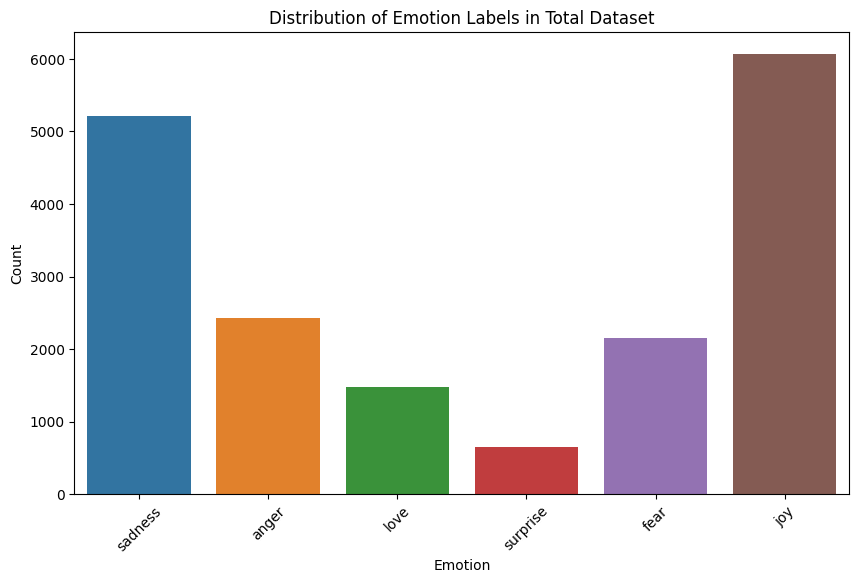

In [5]:
# Visualize the data distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=total_df, x='Reaction')  # Replace 'label' with the actual column name representing emotions
plt.title('Distribution of Emotion Labels in Total Dataset')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [6]:
def custom_encoder(df):
    # Map each emotion to 1 (positive) or 0 (negative)
    df['class'] = df['Reaction'].map({
        'surprise': 1,
        'love': 1,
        'joy': 1,
        'fear': 0,
        'anger': 0,
        'sadness': 0
    })
    return df

In [7]:
# Apply encoding to the total_df to add 'class' column
total_df = custom_encoder(total_df)

# Save the updated dataframe to total_updated.csv
total_df.to_csv('total_updated.csv', index=False)

print("Updated file saved as 'total_updated.csv'")

Updated file saved as 'total_updated.csv'


In [8]:
total_df

,Text,Reaction,class
0,i didnt feel humiliated,sadness,0
1,i can go from feeling so hopeless to so damned...,sadness,0
2,im grabbing a minute to post i feel greedy wrong,anger,0
3,i am ever feeling nostalgic about the fireplac...,love,1
4,i am feeling grouchy,anger,0
...,...,...,...
17995,im having ssa examination tomorrow in the morn...,sadness,0
17996,i constantly worry about their fight against n...,joy,1
17997,i feel its important to share this info for th...,joy,1
17998,i truly feel that if you are passionate enough...,joy,1


In [9]:
# Load the total_updated.csv file
total_df = pd.read_csv('total_updated.csv')

# Check for missing values in 'Reaction' or 'class' columns
missing_values = total_df[total_df[['Reaction', 'class']].isnull().any(axis=1)]
if not missing_values.empty:
    print("Rows with missing values:\n", missing_values)
else:
    print("No missing values found in 'Reaction' or 'class' columns.")


No missing values found in 'Reaction' or 'class' columns.


In [10]:
# Check for unexpected values in 'class' column (values other than 0 or 1)
unexpected_class_values = total_df[~total_df['class'].isin([0, 1])]
if not unexpected_class_values.empty:
    print("Rows with unexpected 'class' values:\n", unexpected_class_values)
else:
    print("All values in 'class' column are as expected (0 or 1).")

All values in 'class' column are as expected (0 or 1).


In [11]:
# Check if any 'Reaction' values are missing a mapped binary class
unmapped_reactions = total_df[total_df['class'].isnull()]
if not unmapped_reactions.empty:
    print("Rows with unmapped reactions:\n", unmapped_reactions)
else:
    print("All reactions have been mapped correctly in 'class' column.")

All reactions have been mapped correctly in 'class' column.


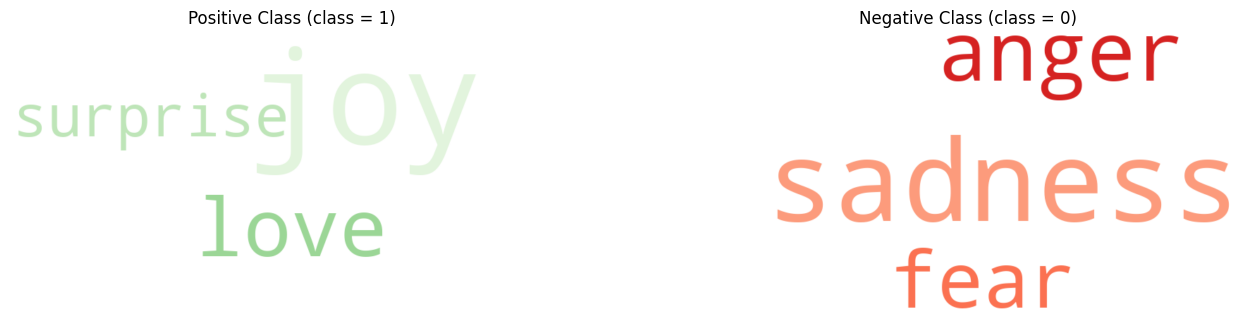

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate text for positive and negative classes
positive_text = ' '.join(total_df[total_df['class'] == 1]['Reaction'].dropna())
negative_text = ' '.join(total_df[total_df['class'] == 0]['Reaction'].dropna())

# Create word clouds
positive_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_text)

# Display the word clouds
plt.figure(figsize=(16, 8))

# Positive class word cloud
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Class (class = 1)')
plt.axis('off')

# Negative class word cloud
plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Class (class = 0)')
plt.axis('off')

plt.show()


In [13]:
total_df = pd.read_csv('total_updated.csv')


In [14]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

# Initialize the Sentiment Intensity Analyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [15]:
# Creating a new 'sentiment' column to fill with the compound score
if 'sentiment' not in total_df.columns:
    total_df.loc[:, 'sentiment'] = 0.0
else:
    total_df.loc[:, 'sentiment'] = 0.0


In [16]:
total_df

,Text,Reaction,class,sentiment
0,i didnt feel humiliated,sadness,0,0.0
1,i can go from feeling so hopeless to so damned...,sadness,0,0.0
2,im grabbing a minute to post i feel greedy wrong,anger,0,0.0
3,i am ever feeling nostalgic about the fireplac...,love,1,0.0
4,i am feeling grouchy,anger,0,0.0
...,...,...,...,...
17995,im having ssa examination tomorrow in the morn...,sadness,0,0.0
17996,i constantly worry about their fight against n...,joy,1,0.0
17997,i feel its important to share this info for th...,joy,1,0.0
17998,i truly feel that if you are passionate enough...,joy,1,0.0


In [17]:
# Initializing the counter for the while loop
i = 0

In [18]:
#Looping through the tweets to perform the analysis
for i in range(18000):
    text = str(total_df.iloc[i]['Text'])
    sentiment_score = analyzer.polarity_scores(text)['compound']
    total_df.at[i, 'sentiment'] = sentiment_score

In [19]:
total_df

,Text,Reaction,class,sentiment
0,i didnt feel humiliated,sadness,0,0.2584
1,i can go from feeling so hopeless to so damned...,sadness,0,0.0821
2,im grabbing a minute to post i feel greedy wrong,anger,0,-0.6597
3,i am ever feeling nostalgic about the fireplac...,love,1,0.1280
4,i am feeling grouchy,anger,0,-0.3400
...,...,...,...,...
17995,im having ssa examination tomorrow in the morn...,sadness,0,0.5047
17996,i constantly worry about their fight against n...,joy,1,0.3919
17997,i feel its important to share this info for th...,joy,1,0.4588
17998,i truly feel that if you are passionate enough...,joy,1,0.9062


In [20]:
#Now is time to convert the sentiment scores into categorical labels
def label_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [21]:
total_df['sentiment_label'] = total_df['sentiment'].apply(label_sentiment)
total_df

,Text,Reaction,class,sentiment,sentiment_label
0,i didnt feel humiliated,sadness,0,0.2584,Positive
1,i can go from feeling so hopeless to so damned...,sadness,0,0.0821,Positive
2,im grabbing a minute to post i feel greedy wrong,anger,0,-0.6597,Negative
3,i am ever feeling nostalgic about the fireplac...,love,1,0.1280,Positive
4,i am feeling grouchy,anger,0,-0.3400,Negative
...,...,...,...,...,...
17995,im having ssa examination tomorrow in the morn...,sadness,0,0.5047,Positive
17996,i constantly worry about their fight against n...,joy,1,0.3919,Positive
17997,i feel its important to share this info for th...,joy,1,0.4588,Positive
17998,i truly feel that if you are passionate enough...,joy,1,0.9062,Positive


In [22]:
# Save the updated dataframe to total_updated.csv
total_df.to_csv('total_updated.csv', index=False)

print("Updated file saved as 'total_updated.csv'")

Updated file saved as 'total_updated.csv'


C:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


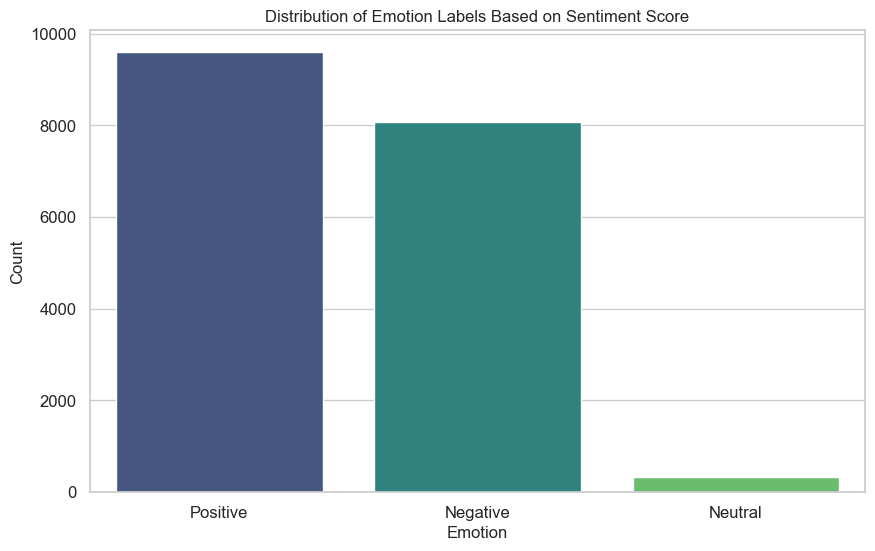

In [23]:
import seaborn as sns
sentiment_counts = total_df['sentiment_label'].value_counts()

# Creating a bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")

plt.title('Distribution of Emotion Labels Based on Sentiment Score')
plt.xlabel('Emotion')
plt.ylabel('Count')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [24]:

## SVM USING TF-IDF VECTORIZATION

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
data = pd.read_csv('total_updated.csv')


In [27]:
data

,Text,Reaction,class,sentiment,sentiment_label
0,i didnt feel humiliated,sadness,0,0.2584,Positive
1,i can go from feeling so hopeless to so damned...,sadness,0,0.0821,Positive
2,im grabbing a minute to post i feel greedy wrong,anger,0,-0.6597,Negative
3,i am ever feeling nostalgic about the fireplac...,love,1,0.1280,Positive
4,i am feeling grouchy,anger,0,-0.3400,Negative
...,...,...,...,...,...
17995,im having ssa examination tomorrow in the morn...,sadness,0,0.5047,Positive
17996,i constantly worry about their fight against n...,joy,1,0.3919,Positive
17997,i feel its important to share this info for th...,joy,1,0.4588,Positive
17998,i truly feel that if you are passionate enough...,joy,1,0.9062,Positive


In [28]:
# Define features and labels
X = data['Text']  # Input text data
y = data['sentiment_label']  # Sentiment labels: Positive, Negative, Neutral

In [29]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data to TF-IDF features
tfidf = TfidfVectorizer(max_features=5000)  # Adjust max_features based on dataset size
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [30]:
# Initialize and train the SVM model
svm_model = SVC(kernel='linear')  # Linear kernel works well for text classification
svm_model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = svm_model.predict(X_test_tfidf)

In [31]:
# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

    Negative       0.86      0.85      0.86      1650
     Neutral       0.75      0.09      0.16        67
    Positive       0.86      0.89      0.87      1883

    accuracy                           0.86      3600
   macro avg       0.82      0.61      0.63      3600
weighted avg       0.86      0.86      0.85      3600

Confusion Matrix:
 [[1407    2  241]
 [  20    6   41]
 [ 208    0 1675]]


In [32]:
# Function to predict sentiment from user input
def predict_sentiment(user_text):
    # Preprocess and transform user text using TF-IDF vectorizer
    user_text_tfidf = tfidf.transform([user_text])  # Transform input text using the fitted TF-IDF vectorizer
    prediction = svm_model.predict(user_text_tfidf)  # Predict using the trained SVM model
    
    return prediction[0]  # Return the predicted sentiment label

# Loop to continuously take user input for testing
while True:
    user_text = input("Enter a text to analyze sentiment (or type 'exit' to quit): ")
    if user_text.lower() == 'exit':
        break
    sentiment = predict_sentiment(user_text)
    print("Predicted Sentiment:", sentiment)


Enter a text to analyze sentiment (or type 'exit' to quit):  im feeling rather rotten so im not very ambitious right now


Predicted Sentiment: Negative


Enter a text to analyze sentiment (or type 'exit' to quit):  i never make her separate from me because i don t ever want her to feel like i m ashamed with her


Predicted Sentiment: Negative


Enter a text to analyze sentiment (or type 'exit' to quit):  EXIT
